# Fruit Data Building

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [3]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/fruit-dataset/fruit-dataset/train",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 5384 images belonging to 6 classes.


In [5]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/fruit-dataset/fruit-dataset/test",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 1696 images belonging to 6 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [7]:
model=Sequential()

In [8]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [9]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [10]:
32*(3*3*3+1)
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [11]:
model.add(Dense(6,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
len(x_train)

225

In [12]:
1238/24

51.583333333333336

In [14]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
225/225 [==============================] - 106s 472ms/step - loss: 0.0694 - accuracy: 0.9747 - val_loss: 0.1237 - val_accuracy: 0.9623
Epoch 2/10
225/225 [==============================] - 105s 466ms/step - loss: 0.0685 - accuracy: 0.9770 - val_loss: 0.1078 - val_accuracy: 0.9682
Epoch 3/10
225/225 [==============================] - 108s 478ms/step - loss: 0.0625 - accuracy: 0.9790 - val_loss: 0.2613 - val_accuracy: 0.9387
Epoch 4/10
225/225 [==============================] - 106s 470ms/step - loss: 0.0780 - accuracy: 0.9738 - val_loss: 0.1380 - val_accuracy: 0.9617
Epoch 5/10
225/225 [==============================] - 105s 465ms/step - loss: 0.0684 - accuracy: 0.9762 - val_loss: 0.1209 - val_accuracy: 0.9670
Epoch 6/10
225/225 [==============================] - 106s 469ms/step - loss: 0.0499 - accuracy: 0.9820 - val_loss: 0.1249 - val_accuracy: 0.9652
Epoch 7/10
225/225 [==============================] - 105s 466ms/step - loss: 0.0466 - accuracy: 0.9835 - val_loss: 0.1981 -

In [15]:
model.save('fruitdata.h5')

In [16]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [17]:
model=load_model('fruitdata.h5')

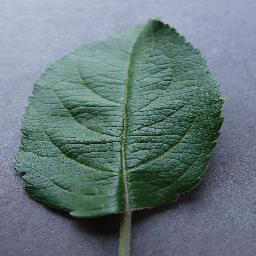

In [18]:
img=image.load_img(r"/content/0ebf06b5-7471-42d7-b8d6-5a53127f90f3___RS_HL 8163.JPG")
img

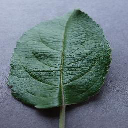

In [19]:
img=image.load_img(r"/content/0ebf06b5-7471-42d7-b8d6-5a53127f90f3___RS_HL 8163.JPG",target_size=(128,128))
img

In [20]:
x=image.img_to_array(img)
x

array([[[179., 187., 208.],
        [181., 189., 210.],
        [183., 191., 212.],
        ...,
        [153., 163., 190.],
        [152., 162., 189.],
        [152., 162., 189.]],

       [[181., 189., 210.],
        [181., 189., 210.],
        [182., 190., 211.],
        ...,
        [156., 166., 193.],
        [156., 166., 193.],
        [154., 164., 191.]],

       [[183., 191., 212.],
        [180., 188., 209.],
        [182., 190., 211.],
        ...,
        [156., 166., 193.],
        [157., 167., 194.],
        [156., 166., 193.]],

       ...,

       [[ 91.,  92., 113.],
        [ 93.,  94., 115.],
        [ 88.,  89., 110.],
        ...,
        [101., 103., 124.],
        [102., 104., 125.],
        [102., 104., 125.]],

       [[ 95.,  96., 117.],
        [ 96.,  97., 118.],
        [ 88.,  89., 110.],
        ...,
        [107., 109., 130.],
        [106., 108., 129.],
        [ 92.,  94., 115.]],

       [[ 89.,  90., 111.],
        [ 98.,  99., 120.],
        [ 93.,  

In [21]:
x=np.expand_dims(x,axis=0)
x

array([[[[179., 187., 208.],
         [181., 189., 210.],
         [183., 191., 212.],
         ...,
         [153., 163., 190.],
         [152., 162., 189.],
         [152., 162., 189.]],

        [[181., 189., 210.],
         [181., 189., 210.],
         [182., 190., 211.],
         ...,
         [156., 166., 193.],
         [156., 166., 193.],
         [154., 164., 191.]],

        [[183., 191., 212.],
         [180., 188., 209.],
         [182., 190., 211.],
         ...,
         [156., 166., 193.],
         [157., 167., 194.],
         [156., 166., 193.]],

        ...,

        [[ 91.,  92., 113.],
         [ 93.,  94., 115.],
         [ 88.,  89., 110.],
         ...,
         [101., 103., 124.],
         [102., 104., 125.],
         [102., 104., 125.]],

        [[ 95.,  96., 117.],
         [ 96.,  97., 118.],
         [ 88.,  89., 110.],
         ...,
         [107., 109., 130.],
         [106., 108., 129.],
         [ 92.,  94., 115.]],

        [[ 89.,  90., 111.],
       

In [22]:
x

array([[[[179., 187., 208.],
         [181., 189., 210.],
         [183., 191., 212.],
         ...,
         [153., 163., 190.],
         [152., 162., 189.],
         [152., 162., 189.]],

        [[181., 189., 210.],
         [181., 189., 210.],
         [182., 190., 211.],
         ...,
         [156., 166., 193.],
         [156., 166., 193.],
         [154., 164., 191.]],

        [[183., 191., 212.],
         [180., 188., 209.],
         [182., 190., 211.],
         ...,
         [156., 166., 193.],
         [157., 167., 194.],
         [156., 166., 193.]],

        ...,

        [[ 91.,  92., 113.],
         [ 93.,  94., 115.],
         [ 88.,  89., 110.],
         ...,
         [101., 103., 124.],
         [102., 104., 125.],
         [102., 104., 125.]],

        [[ 95.,  96., 117.],
         [ 96.,  97., 118.],
         [ 88.,  89., 110.],
         ...,
         [107., 109., 130.],
         [106., 108., 129.],
         [ 92.,  94., 115.]],

        [[ 89.,  90., 111.],
       

In [23]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 127ms/step


In [24]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [25]:
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']

In [26]:
index[y[0]]

'Apple___healthy'

In [28]:
img=image.load_img(r"/content/drive/MyDrive/fruit-dataset/fruit-dataset/test/Apple___healthy/00fca0da-2db3-481b-b98a-9b67bb7b105c___RS_HL 7708.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
index[y[0]]

1/1 [==============================] - 0s 37ms/step


'Apple___healthy'